In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
df = pd.read_csv('ganjar_label.csv')
df = pd.DataFrame(df[[ 'detokens', 'label']])
df

detokens    label
0     kuat pondasi menang sahabat depok kunjung kota...  positif
1      moga lanjut pimpin nasional presiden joko widodo  negatif
2     ajar reformasi birokrasi menangtotal becca has...  negatif
3     kuat pondasi menang sahabat depok kunjung kota...  positif
4     ajar reformasi birokrasi menangtotal becca has...  negatif
...                                                 ...      ...
3908  urus edan urus pasu sopir becak kota bogor dukung  positif
3909  rawan gapura nusantara purnawirawan polri duku...  positif
3910    dukung galang sahabatganjar menang giat positif  positif
3911  gubernur jateng remaja nikah muda salah upaya ...  negatif
3912          ayah presiden semangat abdi bangun negeri  negatif

[3913 rows x 2 columns]

In [3]:
df_negative = df[ (df['label']=='negatif')]
df_positive = df[ (df['label']=='positif')]
#covert to list
negative_list = df_negative['detokens'].tolist()
positive_list = df_positive['detokens'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))
filtered_positive = filtered_positive.lower()

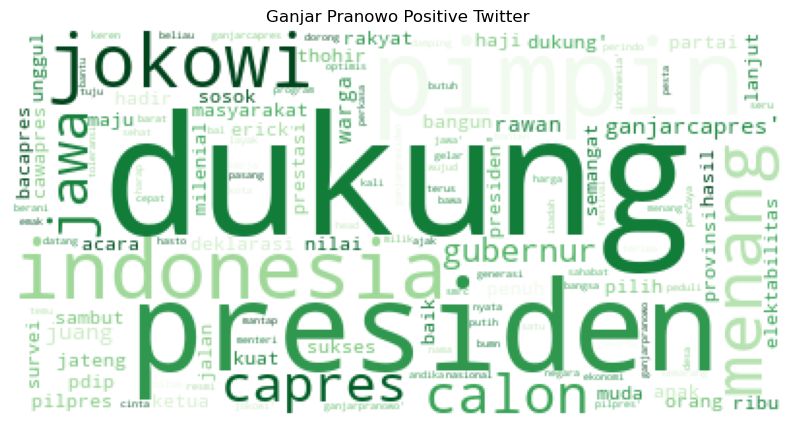

In [4]:
wordcloud = WordCloud(background_color="White",colormap='Greens' , max_words=200, contour_color="steelblue", contour_width=8, collocations=False).generate(filtered_positive)
plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0,y=0)
plt.title("Ganjar Pranowo Positive Twitter")
plt.show()

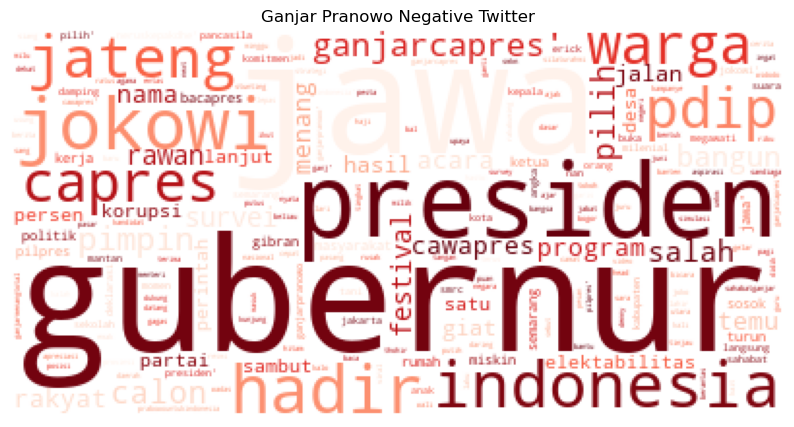

In [5]:
wordcloud = WordCloud(background_color="White", colormap='Reds' ,max_words=200, contour_color="steelblue", contour_width=8, collocations=False).generate(filtered_negative)
plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0,y=0)
plt.title("Ganjar Pranowo Negative Twitter")
plt.show()

# topik

In [6]:
df = pd.read_csv('ganjar_prepro.csv', dtype=str)
df = pd.DataFrame(df[['stemming']])
df

stemming
0     ['kuat', 'pondasi', 'menang', 'sahabat', 'depo...
1     ['moga', 'lanjut', 'pimpin', 'nasional', 'pres...
2     ['ajar', 'reformasi', 'birokrasi', 'menangtota...
3     ['kuat', 'pondasi', 'menang', 'sahabat', 'depo...
4     ['ajar', 'reformasi', 'birokrasi', 'menangtota...
...                                                 ...
3908  ['urus', 'edan', 'urus', 'pasu', 'sopir', 'bec...
3909  ['rawan', 'gapura', 'nusantara', 'purnawirawan...
3910  ['dukung', 'galang', 'sahabatganjar', 'menang'...
3911  ['gubernur', 'jateng', 'remaja', 'nikah', 'mud...
3912  ['ayah', 'presiden', 'semangat', 'abdi', 'bang...

[3913 rows x 1 columns]

In [7]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95)
data = vectorizer.fit_transform(df['stemming'])
feature_names = vectorizer.get_feature_names_out()

In [8]:
n_topics = 10
n_top_words = 10

nmf = NMF(n_components=n_topics).fit(data)
W = nmf.components_
H = nmf.transform(data)

In [9]:
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topik {topic_idx} : {' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words -1 : -1]])}")

Topik 0 : indonesia maju bangun depan bangsa butuh wujud hasil modal ganjarmenangtotal
Topik 1 : jawa gubernur jateng persen bangun warga jalan desa sekolah provinsi
Topik 2 : dukung deklarasi masyarakat rawan partai pilpres perindo capresganjar ganjarpranowo milenial
Topik 3 : presiden calon bacapres juang pdip pilih capresganjar partai terus usung
Topik 4 : jokowi lanjut program terus perintah komitmen bangun presiden ganti kerja
Topik 5 : semarang festival hadir giat daring warga acara gpfestivalsemarang kota sambut
Topik 6 : menang pilpres optimis juang persentase onic pertamina onad drastis satu
Topik 7 : ganjarcapres ganjarpranowo warga ganjarpresiden kalbar pilih baik sambut milu bersamaganjar
Topik 8 : capres pilih survei erick thohir cawapres elektabilitas damping hasil pdip
Topik 9 : pimpin sosok rakyat prestasi butuh anak peduli nilai muda toleransi
